In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sfr_url = 'Data/City_Zhvi_SingleFamilyResidence.csv'
condo_url = 'Data/City_Zhvi_Condominum.csv'
sfr = pd.read_csv(sfr_url, encoding='windows-1252')
condo = pd.read_csv(condo_url, encoding='windows-1252')

In [3]:
sfr = sfr.drop(['Metro', 'CountyName', 'SizeRank'], axis=1)
condo = condo.drop(['Metro', 'CountyName', 'SizeRank'], axis=1)

In [4]:
sfr.shape

(12937, 275)

In [5]:
sfr.head()

,RegionID,RegionName,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,6181,New York,NY,171900.0,172100.0,172400.0,172500.0,172500.0,172400.0,172300.0,...,572800,579500,584900,589700,593800,597100,599200,603400,610700,616800
1,12447,Los Angeles,CA,166400.0,165900.0,165500.0,164900.0,164500.0,164100.0,163800.0,...,704500,709200,711100,712500,713500,714700,716500,719000,722400,726200
2,17426,Chicago,IL,112000.0,113100.0,113900.0,114300.0,114100.0,113600.0,112500.0,...,203400,205300,207000,208300,208600,208700,209200,210000,210700,211500
3,39051,Houston,TX,89100.0,89000.0,89000.0,89200.0,89500.0,89800.0,90200.0,...,182100,183600,184700,185900,186800,187800,188700,189400,190200,191000
4,6915,San Antonio,TX,87300.0,87100.0,87000.0,86800.0,86700.0,86600.0,86600.0,...,165000,166700,167500,168000,168900,170000,170900,172000,173200,174000


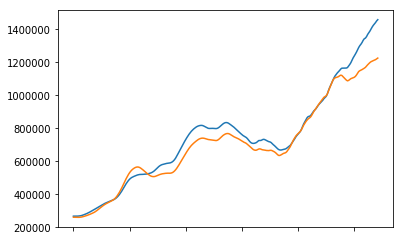

In [6]:
sfr.iloc[13, 3:275].plot()
condo.iloc[13, 3:275].plot()

In [7]:
sfr.iloc[:, 3:275] = sfr.iloc[:, 3:275].fillna(axis=1, method='ffill')

In [8]:
sfr.iloc[:, 3:275] = sfr.iloc[:, 3:275].fillna(axis=1, method='bfill')

In [9]:
condo.head()

,RegionID,RegionName,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,6181,New York,NY,160800.0,161400.0,162000.0,162600.0,163100.0,163500.0,163700.0,...,834000,836700,839400,841200,840400,837400,835700,836700,836200,834500
1,12447,Los Angeles,CA,130800.0,130300.0,129700.0,129200.0,128700.0,128300.0,128000.0,...,539400,543600,545200,546000,545900,546000,546900,548500,550900,553600
2,17426,Chicago,IL,113600.0,115300.0,116900.0,118200.0,119100.0,119700.0,119700.0,...,257800,258300,257800,256800,255500,254300,253300,252000,251100,251200
3,39051,Houston,TX,58600.0,59000.0,59300.0,59700.0,60100.0,60400.0,60700.0,...,104700,105600,106400,106300,106200,107000,108300,109000,108900,108800
4,6915,San Antonio,TX,66000.0,66000.0,66000.0,66000.0,66000.0,66000.0,66100.0,...,117500,118900,119600,120200,120400,120600,121200,121900,122500,123200


In [10]:
condo.shape

(2881, 275)

In [11]:
condo.RegionID.nunique()

2881

In [12]:
condo.iloc[:, 3:275] = condo.iloc[:, 3:275].fillna(axis=1, method='ffill')

In [13]:
condo.iloc[:, 3:275] = condo.iloc[:, 3:275].fillna(axis=1, method='bfill')

In [14]:
sfr2 = pd.melt(sfr, value_vars=sfr.iloc[:, 3:275], id_vars=['RegionID', 'RegionName', 'State'])


In [15]:
sfr2.columns = ['RegionID', 'RegionName', 'State', 'Month', 'Price']

In [16]:
sfr2 = sfr2.set_index('Month')

In [17]:
sfr2.index = pd.DatetimeIndex(sfr2.index)

In [18]:
sfr2.head()

,RegionID,RegionName,State,Price
Month,,,,
1996-04-01,6181,New York,NY,171900.0
1996-04-01,12447,Los Angeles,CA,166400.0
1996-04-01,17426,Chicago,IL,112000.0
1996-04-01,39051,Houston,TX,89100.0
1996-04-01,6915,San Antonio,TX,87300.0


In [19]:
df_all = pd.concat([sfr.iloc[:14, :8].set_index(['RegionID', 'RegionName', 'State']), condo.iloc[:14, :8].set_index(['RegionID', 'RegionName', 'State'])], axis=1, keys=['SFR', 'Condo'])
df_all

SFR                                \
                               1996-04   1996-05   1996-06   1996-07   
RegionID RegionName    State                                           
6181     New York      NY     171900.0  172100.0  172400.0  172500.0   
12447    Los Angeles   CA     166400.0  165900.0  165500.0  164900.0   
17426    Chicago       IL     112000.0  113100.0  113900.0  114300.0   
39051    Houston       TX      89100.0   89000.0   89000.0   89200.0   
6915     San Antonio   TX      87300.0   87100.0   87000.0   86800.0   
13271    Philadelphia  PA      46100.0   46000.0   45900.0   45800.0   
40326    Phoenix       AZ      91000.0   91900.0   92700.0   93400.0   
18959    Las Vegas     NV     132900.0  132600.0  132300.0  132200.0   
54296    San Diego     CA     178600.0  178500.0  178300.0  178000.0   
38128    Dallas        TX      80800.0   81000.0   81300.0   81500.0   
33839    San Jose      CA     238200.0  238900.0  239700.0  240700.0   
10221    Austin        TX     169800.0  169900.0  170800.0  172100.0   
25290    Jacksonville  FL      76600.0   76200.0   75900.0   75800.0   
20330    San Francisco CA     264500.0  264500.0  264500.0  264600.0   

                                           Condo                      \
                               1996-08   1996-04   1996-05   1996-06   
RegionID RegionName    State                                           
6181     New York      NY     172500.0  160800.0  161400.0  162000.0   
12447    Los Angeles   CA     164500.0  130800.0  130300.0  129700.0   
17426    Chicago       IL     114100.0  113600.0  115300.0  116900.0   
39051    Houston       TX      89500.0   58600.0   59000.0   59300.0   
6915     San Antonio   TX      86700.0   66000.0   66000.0   66000.0   
13271    Philadelphia  PA      45700.0   75000.0   74600.0   74200.0   
40326    Phoenix       AZ      94100.0   64400.0   64600.0   64900.0   
18959    Las Vegas     NV     132100.0   79300.0   79300.0   79200.0   
54296    San Diego     CA     177900.0  125100.0  124700.0  124400.0   
38128    Dallas        TX      81700.0   68100.0   68000.0   67800.0   
33839    San Jose      CA     241700.0  166400.0  166300.0  166200.0   
10221    Austin        TX     173400.0  107300.0  105700.0  104200.0   
25290    Jacksonville  FL      75800.0   60500.0   60500.0   60600.0   
20330    San Francisco CA     264900.0  258000.0  257800.0  257600.0   

                                                  
                               1996-07   1996-08  
RegionID RegionName    State                      
6181     New York      NY     162600.0  163100.0  
12447    Los Angeles   CA     129200.0  128700.0  
17426    Chicago       IL     118200.0  119100.0  
39051    Houston       TX      59700.0   60100.0  
6915     San Antonio   TX      66000.0   66000.0  
13271    Philadelphia  PA      73800.0   73500.0  
40326    Phoenix       AZ      65200.0   65500.0  
18959    Las Vegas     NV      79100.0   79100.0  
54296    San Diego     CA     124100.0  123900.0  
38128    Dallas        TX      67800.0   67700.0  
33839    San Jose      CA     166000.0  166000.0  
10221    Austin        TX     103000.0  102100.0  
25290    Jacksonville  FL      60800.0   61100.0  
20330    San Francisco CA     257400.0  257300.0